# SIGMusic Lecture 2: FFT and STFT
### Introduction
In this notebook, we will cover the fundamentals of Fourier Transforms and how they are used in audio computing. We will explain how to perform Short-Time Fourier Transform (STFT) and the inverse, with both pre-built libraries and numpy.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.signal import stft, istft
import IPython.display as ipd
import IPython

## Fourier Transform Math
The Fourier Transform is a powerful tool for analyzing signals in the frequency domain. Any time-domain signal can be expressed as a sum of sinusoids with varying frequencies and amplitudes. 

> Note:
> 
> My explanation today is not going to be able to show the beauty of the Fourier Transform, so I highly recommend watching [3Blue1Brown's video on the topic](https://youtu.be/spUNpyF58BY?si=4wNh3s4Lvfo2KIXl).

The **Fourier Transform** is given by:
$$ F(f) = \int_{-\infty}^{\infty} f(t) e^{-j 2\pi ft} dt $$
where:
- $f(t)$ is the time-domain signal
- $F(f)$ is the frequency-domain signal

$$ e^{-j 2\pi ft} = \cos(2\pi ft) - j\sin(2\pi ft) $$
where:
- $\cos(2\pi ft)$ is the real part of the waveform
- $\sin(2\pi ft)$ is the imaginary part of the waveform

**Let's start by visualizing a sine wave and its Fourier Transform.**

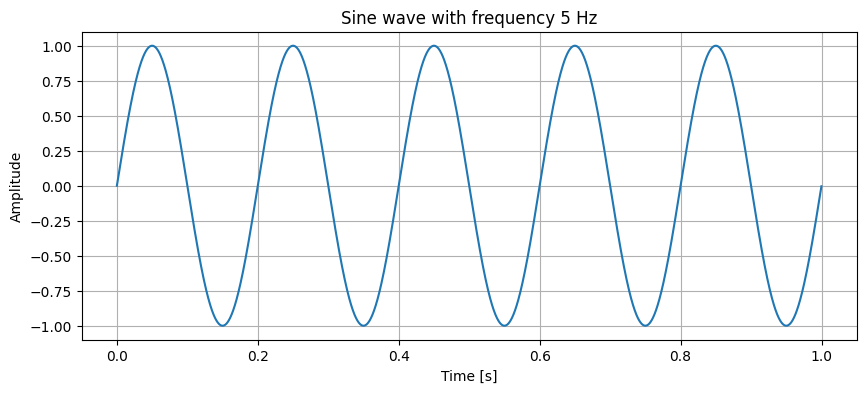

In [2]:
# Fourier Transform Math - Visualizing Sine Wave

# Create a sine wave
sampling_rate = 8000
T = 1.0
t = np.linspace(0.0, T, int(T * sampling_rate), endpoint=False)
freq = 5  # Frequency in Hz
sine_wave = np.sin(2.0 * np.pi * freq * t)

# Plot the sine wave
plt.figure(figsize=(10, 4))
plt.plot(t, sine_wave)
plt.title(f'Sine wave with frequency {freq} Hz')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

## Discrete Fourier Transform (DFT) and Fast Fourier Transform (FFT)
For practical purposes, we use the **Discrete Fourier Transform (DFT)**, which converts a finite sequence of equally spaced samples into a sequence of frequencies. However, the **Fast Fourier Transform (FFT)** algorithm computes the DFT efficiently.

The DFT is given by:
$$ X[k] = \sum_{n=0}^{N-1} x[n] e^{-j 2\pi kn/N} $$
where:
- $x[n]$ is the input signal
- $X[k]$ is the output signal
- $N$ is the number of samples
- $k$ is the frequency index

The FFT algorithm reduces the complexity of computing the DFT from $O(N^2)$ to $O(N \log N)$. One common implementation is the Cooley-Tukey algorithm.
1. **Divide**: Split the input sequence into even and odd elements.
2. **Conquer**: Compute the FFT of the even and odd elements recursively.
3. **Combine**: Combine the FFTs of even and odd elements.

$$ X[k] = E[k] + e^{-j 2\pi k/N} O[k] $$
where:
- $E[k]$ is the FFT of the even elements
- $O[k]$ is the FFT of the odd elements



**Let's compute the FFT of the sine wave.**

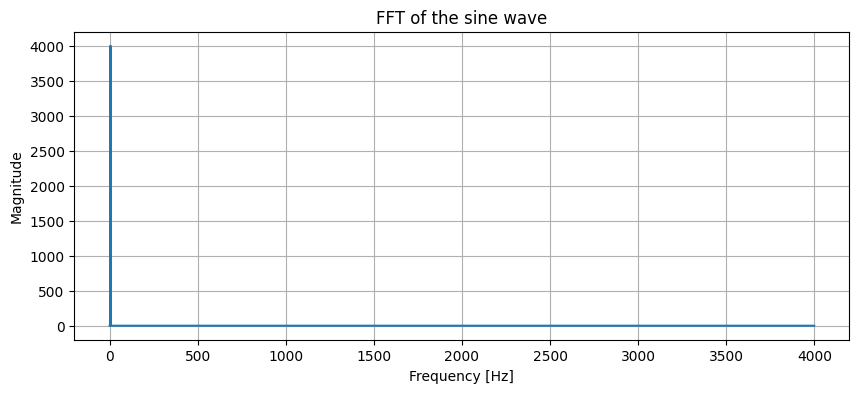

In [3]:
# FFT of the sine wave

# Perform FFT
fft_sine_wave = fft(sine_wave)
fft_freq = np.fft.fftfreq(len(t), 1/sampling_rate)

# Plot the frequency spectrum
plt.figure(figsize=(10, 4))
plt.plot(fft_freq[:len(fft_freq)//2], np.abs(fft_sine_wave[:len(fft_freq)//2])) # we only plot the positive frequencies
plt.title('FFT of the sine wave')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

## Spectrograms and Time-Frequency Representation
A **spectrogram** provides a way to visualize how the frequency content of a signal changes over time. It is created by applying the Short-Time Fourier Transform (STFT) to the signal in small time windows. This gives a **time-frequency representation** of the signal.

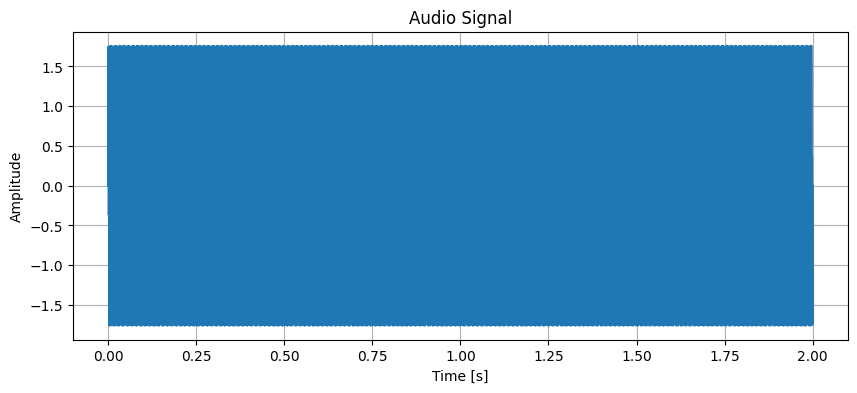

In [4]:
# Generate a spectrogram using librosa

# Load an audio file or generate a signal
duration = 2.0  # seconds
f1, f2 = 220, 440  # frequencies in Hz
t = np.linspace(0, duration, int(sampling_rate * duration))
audio_signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Plot the audio signal
plt.figure(figsize=(10, 4))
plt.plot(t, audio_signal)
plt.title('Audio Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

IPython.display.Audio(audio_signal, rate=sampling_rate)

## Short-Time Fourier Transform (STFT)
The Short-Time Fourier Transform (STFT) is applied by dividing the signal into small, overlapping segments (windows) and applying the Fourier Transform to each window.


$$ X[m, n) = \sum_{k=0}^{N-1} x(n+k)w(k)e^{-j2\pi mk/N} $$
where:
- $x(n)$ is the input signal
- $w(k)$ is the window function
- $X(m, n)$ is the STFT of the signal

$x(n+k)w(k)$ is the windowed signal, which is multiplied by a window function to reduce **spectral leakage**. This is because the Fourier Transform assumes the signal is periodic, which is not true for real-world signals. The window function tapers the signal at the edges to reduce the effect of discontinuities.
Next, each windowed signal is transformed using the DFT to get the frequency content of that window.

This allows us to track how frequencies evolve over time.

Here, we use a library function to compute the STFT, but we will also implement it manually later in the worksheet.

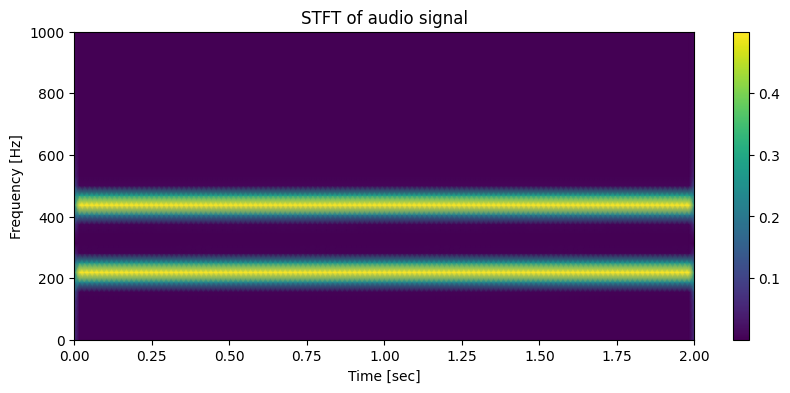

In [5]:
# Use scipy's STFT

frequencies, times, Zxx = stft(audio_signal, fs=sampling_rate, nperseg=256)

# Plot the STFT
plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('STFT of audio signal')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 1000)
plt.colorbar()
plt.show()

Inverse STFT is used to reconstruct the signal from the STFT. It is given by:
$$ x(n) = \sum_{m=0}^{M-1} X(m, n)w(n-m) $$
where:
- $X(m, n)$ is the STFT of the signal
- $w(n-m)$ is the window function

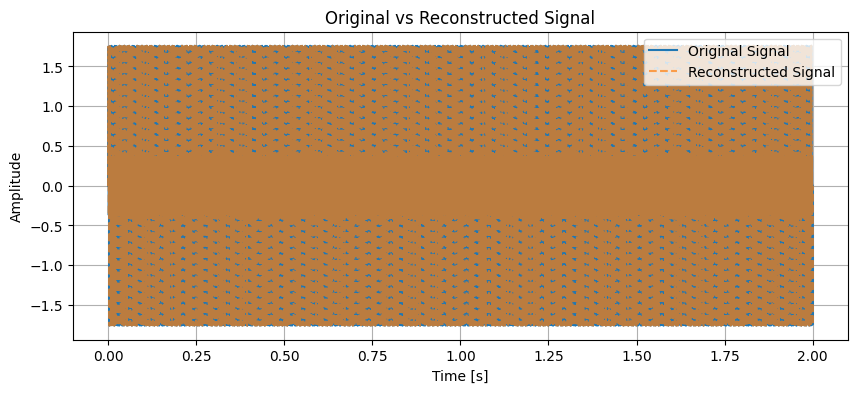

In [6]:
# Invert the STFT to get the original signal back
_, reconstructed_signal = istft(Zxx, fs=sampling_rate)

# Plot the original and reconstructed signal for comparison
plt.figure(figsize=(10, 4))
plt.plot(t, audio_signal, label='Original Signal')
plt.plot(t, reconstructed_signal, linestyle='--', label='Reconstructed Signal', alpha=0.7)
plt.title('Original vs Reconstructed Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

In [7]:
ipd.Audio(reconstructed_signal, rate=sampling_rate)

## Writing STFT and Inverse STFT from Scratch
Now, let's implement STFT and inverse STFT manually using `numpy`.

The idea is to window the signal and apply FFT to each window. The inverse STFT stitches the signal back together from the windows.

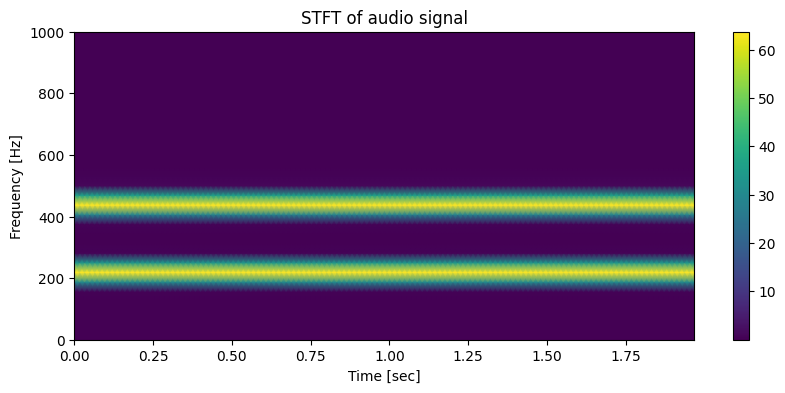

In [8]:
# STFT from scratch

def stft_custom(signal, window_size, hop_size):
    """
    Compute the Short-Time Fourier Transform (STFT) of a signal.
    
    Parameters:
    signal (array): Input signal
    window_size (int): Size of the FFT window
    hop_size (int): Number of samples between successive FFT windows
    
    Returns:
    complex array: STFT of the signal
    """
    window = np.hanning(window_size)
    
    # Calculate number of windows based on hop size
    num_windows = (len(signal) - window_size) // hop_size + 1
    
    # Prepare the STFT result (frequency bins x time frames)
    stft_matrix = np.zeros((window_size//2 + 1, num_windows), dtype=complex)
    
    # Loop over windows and apply FFT to each
    for i in range(num_windows):
        start_idx = i * hop_size
        end_idx = start_idx + window_size
        windowed_signal = signal[start_idx:end_idx] * window
        
        # Compute FFT and store only the positive frequencies
        stft_matrix[:, i] = np.fft.rfft(windowed_signal)
    
    # Create the frequency and time arrays
    frequencies = np.fft.rfftfreq(window_size, d=1/sampling_rate)
    times = np.arange(num_windows) * hop_size / sampling_rate
    
    return frequencies, times, stft_matrix

window_size = 256
hop_size = 128
frequencies, times, stft_matrix = stft_custom(audio_signal, window_size, hop_size)

# Plot the custom STFT
plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, np.abs(stft_matrix), shading='gouraud')
plt.title('STFT of audio signal')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 1000)
plt.colorbar()
plt.show()

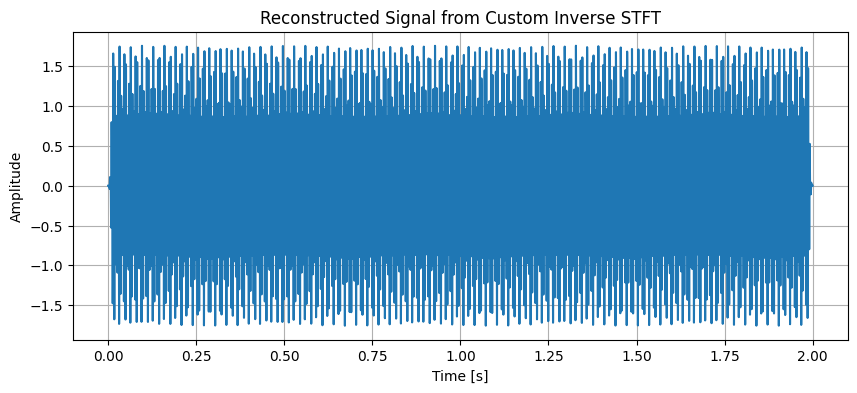

In [9]:
# Inverse STFT from scratch

def istft_custom(stft_matrix, window_size, hop_size):
    window = np.hanning(window_size)
    
    # Number of time frames (columns) in the STFT matrix
    num_frames = stft_matrix.shape[1]
    
    # Initialize the reconstructed signal (with padding for overlap)
    signal_length = num_frames * hop_size + window_size
    reconstructed_signal = np.zeros(signal_length)
    # normalization_factor = np.zeros(signal_length)
    
    # Loop over each frame, apply inverse FFT and overlap-add
    for i in range(num_frames):
        # Get the start and end indices for placing the reconstructed window
        start_idx = i * hop_size
        end_idx = start_idx + window_size
        
        # Inverse FFT of the current frame
        windowed_signal = np.fft.irfft(stft_matrix[:, i], n=window_size)
        
        # Overlap-add the windowed signal and apply the window function
        reconstructed_signal[start_idx:end_idx] += windowed_signal * window
        # normalization_factor[start_idx:end_idx] += window ** 2
    
    # Normalize by the windowing function to account for overlap
    # reconstructed_signal /= np.where(normalization_factor > 0, normalization_factor, 1)
    
    return reconstructed_signal

reconstructed_signal = istft_custom(stft_matrix, window_size, hop_size)

# Plot the reconstructed signal
plt.figure(figsize=(10, 4))
plt.plot(t, reconstructed_signal[:len(t)])
plt.title('Reconstructed Signal from Custom Inverse STFT')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [10]:
ipd.Audio(reconstructed_signal, rate=sampling_rate)

Hmm... That does not sound correct. What is the issue here?

## Overlap-Add in STFT 
The STFT is usually computed with overlap between windows to reduce artifacts. The overlap-add method is used to reconstruct the signal from the STFT, where the windows are added together with overlap.

## Issues with overlap-add
The sum of overlapping windows can cause the signal to have uneven magnitudes in the overlap regions. To avoid this, the windows are usually normalized by a window function. Here, we use the Hann window. The normalization factor is given by:
$$ \text{norm} = \text{norm} + w(n-m)^2 $$

The normalization factor finds the sum of squared window values in the overlap regions. The signal is then divided by the normalization factor to avoid amplifying the signal in the overlap regions.

In [ ]:
# Inverse STFT from scratch

def istft_normalized(stft_matrix, window_size, hop_size):
    window = np.hanning(window_size)
    
    # Number of time frames (columns) in the STFT matrix
    num_frames = stft_matrix.shape[1]
    
    # Initialize the reconstructed signal (with padding for overlap)
    signal_length = num_frames * hop_size + window_size
    reconstructed_signal = np.zeros(signal_length)
    normalization_factor = np.zeros(signal_length)
    
    # Loop over each frame, apply inverse FFT and overlap-add
    for i in range(num_frames):
        # Get the start and end indices for placing the reconstructed window
        start_idx = i * hop_size
        end_idx = start_idx + window_size
        
        # Inverse FFT of the current frame
        windowed_signal = np.fft.irfft(stft_matrix[:, i], n=window_size)
        
        # Overlap-add the windowed signal and apply the window function
        reconstructed_signal[start_idx:end_idx] += windowed_signal * window
        normalization_factor[start_idx:end_idx] += window ** 2
    
    # Normalize by the windowing function to account for overlap
    reconstructed_signal /= np.where(normalization_factor > 0, normalization_factor, 1)
    
    return reconstructed_signal

reconstructed_signal = istft_normalized(stft_matrix, window_size, hop_size)

# Plot the reconstructed signal
plt.figure(figsize=(10, 4))
plt.plot(t, reconstructed_signal[:len(t)])
plt.title('Reconstructed Signal from Normalized Inverse STFT')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [ ]:
ipd.Audio(reconstructed_signal, rate=sampling_rate)

## Advanced Topics
### Windowing Functions
Different windowing functions (Hann, Hamming, etc.) affect the frequency resolution and leakage in the STFT. Try experimenting with different window functions and observe how they change the spectrogram and the inverse reconstruction.